# Optimizing Electric Vechile Charging Points Placement using Hybrid Quantum Genetic Algorithm

### Initialization

In [3]:
import utils
import hybridgeneticalgo_v2 as HGA
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
population_size = 20
num_new_charging_points = 5
selection_size = 5
num_existing_charging_points = 5
num_points_of_interest = 10
num_of_qubits_for_one_point = 5

# Bounds of the search space
X_MIN, X_MAX = 17.3, 17.6
Y_MIN, Y_MAX = 78.3, 78.6

### Generating random population

In [5]:
# Replace 'output_file.csv' with the actual file path
evcp_file_path_1 = 'EV_STATIONS_HYD.csv'

# Read the filtered CSV file into a pandas DataFrame
evcp_df = pd.read_csv(evcp_file_path_1)

evcp_df

,name,state,city,address,lattitude,longitude,type
0,HPCL Yapral DC Charging Station,Telangana,Secunderabad,"Hindustan Petroleum Corporation Limited, Jai J...",17.502000,78.539000,12.0
1,HP Loyal Pump and Pantry Fuel Charging Station,Telangana,Secunderabad,"42-601, SP NAGAR, ECIL Main Rd, SSS Tower, MJ ...",17.467700,78.564100,12.0
2,The Moonshine Project restaurant Jubilee Hills,Rajasthan,hyderabad,"385, Road Number 82, Film Nagar, Jubilee Hills,",17.414200,78.407700,6.0
3,Almond House Banjara Hills,TamilNadu,hyderabad,"8-2-350/3/1, Next to Meena Bazar, Rd Number 3,...",17.427019,78.443419,6.0
4,Almond House Kukatpally,WestBengal,hyderabad,"490, JNTU - Hitech City Road, K P H B Phase 3,...",17.485859,78.390420,6.0
...,...,...,...,...,...,...,...
62,The Golkonda Hotel,Telangana,Hyderabad,"The Golkonda Hotel, Ambedkar Nagar, Masab Tank...",17.400000,78.450000,21.0
63,Palm Meadows,Telangana,Hyderabad,"Palm Meadows Rd, Laxmi Nagar Colony, Kompally ...",17.560000,78.480000,21.0
64,Sohini Tech Park,Telangana,Hyderabad,"Nanakramguda Road, Financial district, Gachibo...",17.420000,78.350000,21.0
65,Tata Power,Telangana,Hyderabad,"Srinidhi Service Station, Nizampet, Survey No:...",17.517565,78.380926,7.0


In [6]:
# Create a list of tuples with (longitude, latitude) coordinates
existing_charging_points = list(zip(evcp_df['lattitude'], evcp_df['longitude']))

# Display the list of existing charging points
print("Existing Charging Points:")
print(existing_charging_points)

Existing Charging Points:
[(17.502, 78.539), (17.4677, 78.5641), (17.4141998291016, 78.4076995849609), (17.4270191, 78.4434192), (17.485859, 78.39042), (17.456842, 78.364575), (17.441011, 78.503158), (17.486819, 78.5431269), (17.400595, 78.508078), (17.4139784, 78.3275492), (17.3916834, 78.4766724), (17.452666, 78.380343), (17.447469, 78.57175), (17.3998101, 78.5551167), (17.4306503, 78.4020035), (17.4453566, 78.3556014), (17.46377, 78.3088), (17.34763, 78.475397), (17.4435458, 78.4798274), (17.377497, 78.5580849), (17.5173192, 78.3188293), (17.454398, 78.434575), (17.45848, 78.5), (17.490308, 78.354536), (17.423858, 78.347334), (17.478362, 78.4737723), (17.4368304, 78.3983261), (17.41816383, 78.34665104), (17.391095, 78.558504), (17.428624, 78.450418), (17.44798402, 78.38432828), (17.49699433, 78.37194716), (17.41406061, 78.45778047), (17.31694482, 78.40246655), (17.494851, 78.336467), (17.435968, 78.40003), (17.523923, 78.430328), (17.438229, 78.457263), (17.444838, 78.466949), (17.4

In [7]:
# Replace 'output_file.csv' with the actual file path
evcp_file_path_2 = 'HYD_Dataset.csv'

data = pd.read_csv('HYD_Dataset.csv')  # Replace 'data.csv' with your file name
coords = data[['Lattitude(N)', 'Longitude(E)']].values

# Read the filtered CSV file into a pandas DataFrame
evcp_df_2 = pd.read_csv(evcp_file_path_2)

evcp_df_2

,City,Place,Lattitude(N),Longitude(E)
0,Hyderabad,Ramoji Film city,17.264100,78.681800
1,Hyderabad,Charminar,17.361600,78.474700
2,Hyderabad,Hussain Sagar Lake,17.423900,78.473800
3,Hyderabad,Wonderla,17.221193,78.528246
4,Hyderabad,GravityZip,17.390241,78.325443
5,Hyderabad,Chowmahalla Palace,17.358079,78.471658
6,Hyderabad,Golkonda Fort,17.383885,78.400931
7,Hyderabad,Statue of Equality,17.186341,78.333249
8,Hyderabad,Thrill City,17.435769,78.474496
9,Hyderabad,Shilparamam,17.453719,78.378681


In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

# Fit the DBSCAN model
dbscan = DBSCAN(eps=0.08, min_samples=7)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(coords)

# Get the indices of the outliers
outlier_indices = np.where(clusters == -1)[0]

# Remove the outliers from the original dataset
cleaned_coords = np.delete(coords, outlier_indices, axis=0)

# Create a new DataFrame with the cleaned data
cleaned_data = data.drop(data.index[outlier_indices])

# Save the cleaned data to a new Excel file
cleaned_data.to_csv('cleaned_data.csv', index=False)

print(f"Original dataset shape: {data.shape}")
print(f"Cleaned dataset shape: {cleaned_data.shape}")

Original dataset shape: (47, 4)
Cleaned dataset shape: (38, 4)


In [9]:
# Replace 'output_file.csv' with the actual file path
evcp_file_path_3 = 'cleaned_data.csv'


# Read the filtered CSV file into a pandas DataFrame
evcp_df_3 = pd.read_csv(evcp_file_path_3)

evcp_df_3

,City,Place,Lattitude(N),Longitude(E)
0,Hyderabad,Charminar,17.361600,78.474700
1,Hyderabad,Hussain Sagar Lake,17.423900,78.473800
2,Hyderabad,GravityZip,17.390241,78.325443
3,Hyderabad,Chowmahalla Palace,17.358079,78.471658
4,Hyderabad,Golkonda Fort,17.383885,78.400931
5,Hyderabad,Thrill City,17.435769,78.474496
6,Hyderabad,Shilparamam,17.453719,78.378681
7,Hyderabad,Birla Mandir,17.406472,78.469071
8,Hyderabad,Taramati Baradari,17.376567,78.378963
9,Hyderabad,Jala Vihar,17.433027,78.464709


In [10]:
points_of_interest = list(zip(evcp_df_3['Lattitude(N)'], evcp_df_3['Longitude(E)']))

In [11]:
import random

num_points = 3

# Generate random X and Y coordinates for powergrids
powergrids = [(random.uniform(X_MIN, X_MAX), random.uniform(Y_MIN, Y_MAX)) for _ in range(num_points)]

# Display the generated powergrids coordinates
print("Generated powergrids coordinates:")
print(powergrids)

Generated powergrids coordinates:
[(17.489372597046458, 78.42042172762616), (17.39175466649122, 78.37419264859798), (17.44883754622136, 78.43232014288502)]


In [12]:
import folium
import numpy as np

# Convert the list to a DataFrame
existing_charging_points_df = pd.DataFrame(existing_charging_points, columns=['latitude', 'longitude'])

# Calculate the median latitude and longitude
median_latitude = np.median(existing_charging_points_df['latitude'])
median_longitude = np.median(existing_charging_points_df['longitude'])

# Create a Folium map centered at the median coordinates
my_map = folium.Map(location=[median_latitude, median_longitude], zoom_start=10.5)

# Define colors for each set of coordinates
marker_colors = ['red', 'green', 'orange']

# Add markers for each set of coordinates with the corresponding color
coordinates_sets = [existing_charging_points, points_of_interest, powergrids]

for i, coord_set in enumerate(coordinates_sets):
    color = marker_colors[i]
    for coord in coord_set:
        folium.Marker(coord, icon=folium.Icon(color=color)).add_to(my_map)

# Display the map inline
my_map

In [13]:
# Assuming coordinates_sets is a list of lists, where each sublist contains (latitude, longitude) coordinates
# Replace existing_charging_points, points_of_interest, and powergrids with your actual lists

coordinates_sets = [existing_charging_points, points_of_interest, powergrids]

# Combine all coordinates from the three sets
all_coordinates = np.concatenate(coordinates_sets)

# Find the minimum and maximum coordinates for both latitude and longitude
min_latitude, min_longitude = np.min(all_coordinates, axis=0)
max_latitude, max_longitude = np.max(all_coordinates, axis=0)

# Extend the bounds by 0.5 in all directions
extended_min_latitude = min_latitude - 0.005
extended_min_longitude = min_longitude - 0.005
extended_max_latitude = max_latitude + 0.005
extended_max_longitude = max_longitude + 0.005

# Calculate the center of the extended bounding box
center_latitude = (extended_min_latitude + extended_max_latitude) / 2
center_longitude = (extended_min_longitude + extended_max_longitude) / 2

# Create a Folium map centered at the median coordinates
my_map = folium.Map(location=[median_latitude, median_longitude], zoom_start=10.5)

# Define colors for each set of coordinates
marker_colors = ['red', 'green', 'orange']

# Add markers for each set of coordinates with the corresponding color
for i, coord_set in enumerate([existing_charging_points, points_of_interest, powergrids]):
    color = marker_colors[i]
    for coord in coord_set:
        folium.Marker(coord, icon=folium.Icon(color=color)).add_to(my_map)

# Add a rectangle representing the extended bounding box
folium.Rectangle(bounds=[(extended_min_latitude, extended_min_longitude),
                         (extended_max_latitude, extended_max_longitude)],
                 color='black',
                 fill=True,
                 fill_color='gray',
                 fill_opacity=0.3).add_to(my_map)

# Display the map inline
my_map

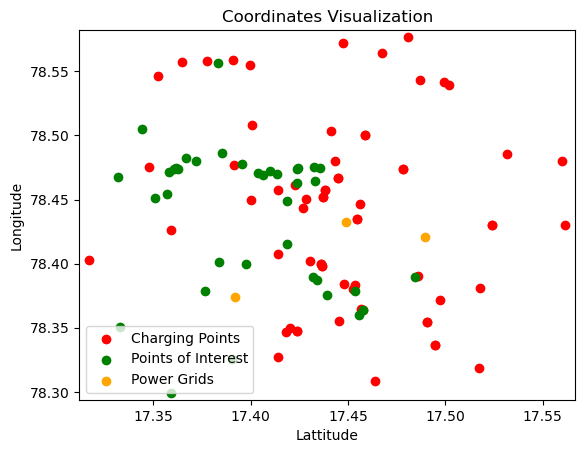

In [14]:
charging_x, charging_y = zip(*existing_charging_points)
interest_x, interest_y = zip(*points_of_interest)
power_x, power_y = zip(*powergrids)

plt.scatter(charging_x, charging_y, color='red', label='Charging Points')
plt.scatter(interest_x, interest_y, color='green', label='Points of Interest')
plt.scatter(power_x, power_y, color='orange', label='Power Grids')

plt.xlabel('Lattitude')
plt.ylabel('Longitude')
plt.title('Coordinates Visualization')

plt.legend()

X_MIN, Y_MIN = extended_min_latitude, extended_min_longitude
X_MAX, Y_MAX = extended_max_latitude, extended_max_longitude

plt.xlim(X_MIN, X_MAX)
plt.ylim(Y_MIN, Y_MAX)

plt.show()

### Dividing the population into different possible grids

Graph #: 1


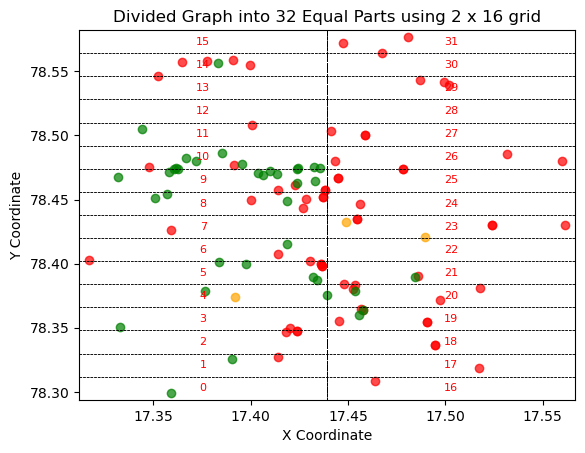

Graph #: 2


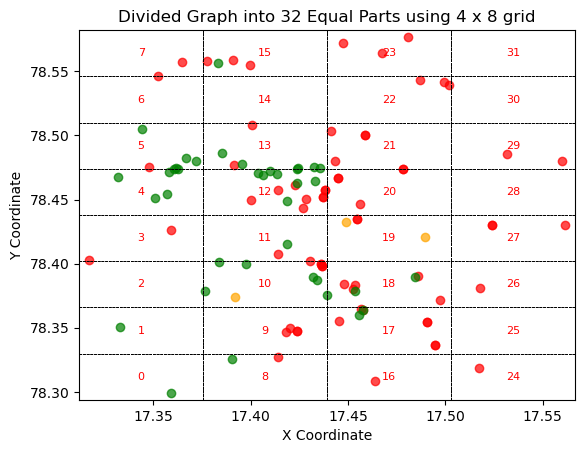

Graph #: 3


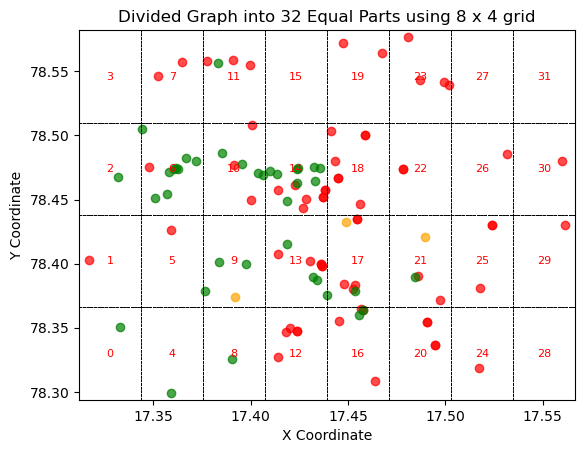

Graph #: 4


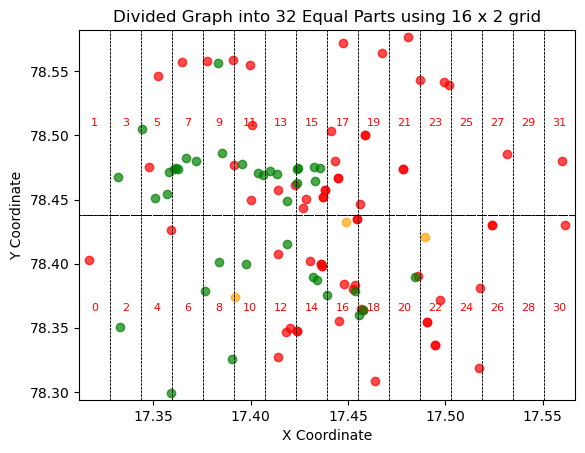

In [15]:
utils.check_possibilities(X_MIN, X_MAX, Y_MIN, Y_MAX, num_of_qubits_for_one_point, existing_charging_points, points_of_interest, powergrids)

### Selecting the best Gird

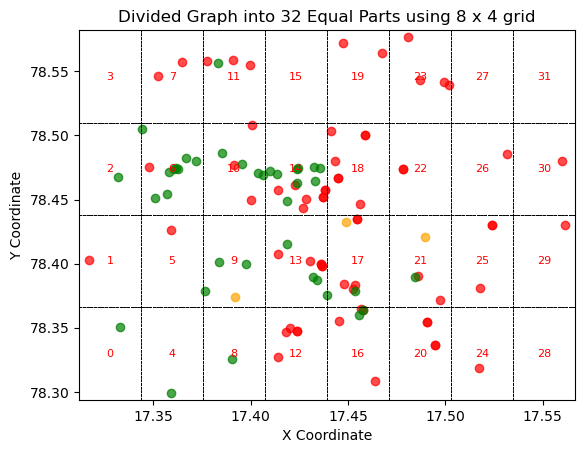

In [16]:
'''
The numbering starts from 1,2,3,..
'''
final_grid = 3
boundaries = {}

boundaries = utils.divide_graph_into_parts(X_MIN, X_MAX, Y_MIN, Y_MAX, num_of_qubits_for_one_point, existing_charging_points, points_of_interest, powergrids, final_grid, save_grids=True)

### Extracting useful information from thefinal plot

In [17]:
points_counts = utils.count_points_in_grids(existing_charging_points, points_of_interest, powergrids, boundaries)

utils.display_boundaries_table(boundaries, points_counts)

+-------------+--------------------+--------------------+-------------------+-------------------+--------------------------------+--------------------------+--------------------+-------------+
| Grid Number |      X Start       |       X End        |      Y Start      |       Y End       |         Adjacent Pairs         | Existing Charging Points | Points of Interest | Power Grids |
+-------------+--------------------+--------------------+-------------------+-------------------+--------------------------------+--------------------------+--------------------+-------------+
|      0      |    17.31194482     |   17.3437793425    | 78.29387514000001 | 78.36594385500001 |            1, 4, 5             |            0             |         1          |      0      |
|      1      |    17.31194482     |   17.3437793425    | 78.36594385500001 | 78.43801257000001 |         0, 2, 4, 5, 6          |            1             |         0          |      0      |
|      2      |    17.31194482     

In [18]:
fitness_dict = utils.create_fitness_dict(boundaries, points_counts)

# utils.display_fitness_table(fitness_dict)

### Generating population

In [19]:
population_space = [i for i in range(2**num_of_qubits_for_one_point)]

print("Ppopulation space:")
print(population_space)

Ppopulation space:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [20]:
Generation = HGA.population_generator(population_space, population_size, num_new_charging_points)

print(Generation)

[[28, 4, 25, 14, 31], [21, 4, 10, 26, 24], [6, 21, 17, 22, 30], [28, 11, 0, 24, 13], [15, 18, 12, 6, 8], [26, 15, 25, 13, 5], [25, 31, 10, 0, 17], [4, 15, 27, 29, 31], [24, 10, 2, 17, 31], [0, 6, 14, 7, 23], [7, 24, 9, 20, 19], [5, 17, 1, 26, 15], [27, 1, 6, 7, 15], [18, 2, 23, 12, 0], [30, 3, 4, 21, 17], [19, 0, 15, 4, 5], [9, 10, 25, 17, 22], [14, 30, 16, 20, 5], [18, 17, 27, 7, 13], [23, 3, 25, 17, 10]]


### Fitness function

In [21]:
top_population = HGA.select_top_population(Generation, fitness_dict)

print("Top 5 individuals:", top_population)

Top 5 individuals: [[25, 31, 10, 0, 17], [24, 10, 2, 17, 31], [30, 3, 4, 21, 17], [21, 4, 10, 26, 24], [9, 10, 25, 17, 22]]


### Genetic Algorithm - Iteration

In [ ]:
def Genetic_Algorithm(Generation, fitness_dict, num_of_qubits_for_one_point):
    total_iterations = 250
    for i in tqdm(range(total_iterations), desc="Generations", bar_format='{desc}: {percentage:3.0f}%|{bar:10}{r_bar}{bar:-10b} Elapsed: {elapsed}'):
        top_population = HGA.select_top_population(Generation, fitness_dict)
        generations = []
        for i in range(len(top_population)):
            if i != len(top_population)-1: 
                parent_1 = HGA.encode_numbers_in_circuits(top_population[i])
                parent_2 = HGA.encode_numbers_in_circuits(top_population[i%(len(top_population) - 1) + 1])
            else:
                parent_1 = HGA.encode_numbers_in_circuits(top_population[i])
                parent_2 = HGA.encode_numbers_in_circuits(top_population[i%(len(top_population) - 1)])
            child_1, child_2 = HGA.crossover(parent_1, parent_2)
            child_1 = HGA.mutation(child_1)
            child_2 = HGA.mutation(child_2)

            c_child_1 = HGA.decode_circuits(child_1)
            c_child_2 = HGA.decode_circuits(child_2)

            HGA.generate_population(generations, c_child_1, c_child_2, num_of_qubits_for_one_point)
       
        Generation = generations
        #print(Generation)

    final_set = HGA.select_top_population(Generation, fitness_dict)
    return final_set
        

Possible_Coordinates = Genetic_Algorithm(Generation, fitness_dict, num_of_qubits_for_one_point)

Generations:  36%|███▌      | 89/250 [04:26<08:05,  3.02s/it]                                            Elapsed: 04:26

### Final Results

In [ ]:
import matplotlib.pyplot as plt


j = 1
# Plot the new areas from final_set
for _ in Possible_Coordinates:
    print("Possibility No.", j, ":")
    print()
    k = 1
    for i in (_):
        charging_x, charging_y = zip(*existing_charging_points)
        interest_x, interest_y = zip(*points_of_interest)

        plt.scatter(charging_x, charging_y, color='red', label='Charging Points')
        plt.scatter(interest_x, interest_y, color='green', label='Points of Interest')
        plt.scatter(power_x, power_y, color='orange', label='Power Grids')
        x_start, x_end, y_start, y_end = boundaries[i]['x_start'], boundaries[i]['x_end'], boundaries[i]['y_start'], boundaries[i]['y_end']
        print(f"Charging point No. {k}'s grid")
        print(f"x-coordinates: {x_start}, {x_end}; y-coordinates:{y_start}, {y_end}")
        width = x_end - x_start
        height = y_end - y_start
        rect = plt.Rectangle((x_start, y_start), width, height, alpha=0.3, color='blue')
        plt.gca().add_patch(rect)
        k += 1
    print()
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Coordinates Visualization')

    #plt.legend()

    plt.show()

    j += 1


In [ ]:
# Define colors for each set of coordinates
marker_colors = ['red', 'green', 'orange']
distances = []
# Create 5 different maps
for j, possibility in enumerate(Possible_Coordinates, start=1):
    # Create a Folium map centered at the median coordinates
    my_map = folium.Map(location=[median_latitude, median_longitude], zoom_start=10.5)

    # Plot the areas for the current possibility
    for i, coord_set in enumerate([existing_charging_points, points_of_interest, powergrids]):
        color = marker_colors[i]
        for coord in coord_set:
            folium.CircleMarker(location=coord, radius=5, color=color, fill=True).add_to(my_map)
    avg_distances = []
    # Add rectangles as polygons
    for i in possibility:
        rectangle = folium.Polygon(locations=[
            (boundaries[i]['x_start'], boundaries[i]['y_start']),
            (boundaries[i]['x_end'], boundaries[i]['y_start']),
            (boundaries[i]['x_end'], boundaries[i]['y_end']),
            (boundaries[i]['x_start'], boundaries[i]['y_end'])
        ], color='blue', fill=True, fill_color='blue', fill_opacity=0.3)
        rectangle.add_to(my_map)
        avg_distances.append(utils.calculate_avg_distance_to_boundary_midpoint(boundaries, points_of_interest, i)) 
        
    # Save the map as an HTML file (you can also display it inline)
    map_file_path = f'map_{j}_classical.html'
    print("------------------------------------")
    overall_avg_distance = sum(avg_distances) / len(avg_distances) if avg_distances else 0
    print(f"Overall average distance from points of interest to the middle point of boundaries: {overall_avg_distance}")
    distances.append(overall_avg_distance)
    my_map.save(map_file_path)

    print(f"Map for Possibility No. {j} saved as {map_file_path}")
    print("------------------------------------")

In [ ]:
from IPython.display import display, HTML

# Create 5 different maps
for j in range(1, 6):
    # Load the saved HTML file
    map_file_path = f'map_{j}.html'

    print(f"Map for Possibility No. {j} displayed.")
    
    # Display the HTML file in the notebook
    display(HTML(f'<iframe src={map_file_path} width=800 height=500></iframe>'))
    

In [ ]:
distances